# Plynty Bureau of Labor Statistics Consumer Expenditure Analysis

[BLS Comsumer Expenditure Survey](https://www.bls.gov/cex/home.htm)

[Interview Data Dictionary](https://www.bls.gov/cex/2015/csxintvwdata.pdf)

[Diary Data Dictionary](https://www.bls.gov/cex/2015/csxdiarydata.pdf)

### Where to download the BLS CE PUMD
- The zip files download automatically
- To download the Stub files open the links then right click and choose "Save As..."

[2015 interview zip file](https://www.bls.gov/cex/pumd/data/comma/intrvw15.zip)

[2015 diary zip file](https://www.bls.gov/cex/pumd/data/comma/diary15.zip)

[2015 IntStub file](https://www.bls.gov/cex/pumd/2014/csxintstub.txt)

[2015 IStub file](https://www.bls.gov/cex/pumd/2014/csxistub.txt)

[2015 DStub file](https://www.bls.gov/cex/pumd/2014/csxdstub.txt)

### This Scripts Goals for Plynty
- Create an easy to use analysis script for the BLS CE PUMD 
- Create a csv files that has average percentages spent on plynty categories for certain income classes
- Create incomeclasses that are stastically significant

##### Importing Libraries 

In [1]:
import pandas as pd
# import numpy as np
import os
import subprocess
import math
import matplotlib.pyplot as plt
from plyntywidgets import *
from blsFunctions import *

### Setting Parameters
- year: the last two number associated with the year of the data
    for example for data from 2015: year = "15"
- minAge: the low bound (inclusive) of the age range you wish to subset by
- maxAge: the high bound (inclusive) of the age range you wish to subset by
- incomeBrackets: array of numbers that you wish to create the new income classes
    the bracketing works as follows (1,2], (2,3], (3,4]
- filesToRead: the strings of the abbreviations associated with the files you wish to read
    options are: "all", "diary", "interview", "dtbd", "expd", "fmld", "memd", "fmli", "itbi", "memi", "mtbi", "ntaxi"

In [2]:
year = "15"
# hard coding ages
# minAge = 55
# maxAge = 64
# filesToRead = ["fmli", "mtbi"]
incomeBrackets = [-math.inf,11000,20000,30000,43000,55000,69000,80000,100000,120000,150000,200000,250000,300000,math.inf]

# Display Cool widgets
display(ageRange, readFiles)

### Using the widgets to set values

In [3]:
# setting age range using the cool widget
minAge = ageRange.value[0]
maxAge = ageRange.value[1]
# setting the filesToRead using the cool widget
filesToRead = readFiles.value

### Setting Directory locations and FileNames on your Local Machine

In [4]:
# directory in which the diary and interview folders are held is located
diaryDir = "/Users/adyke/Vizuri/CE_PUMD/diary15/"
interviewDir = "/Users/adyke/Vizuri/CE_PUMD/intrvw15/"

# Directory where stubfiles are located
pathToStubFileDir = "/Users/adyke/Vizuri/Stubfiles/"
rScriptStubfilePathAndName = "/Users/adyke/Vizuri/BLS_Python_Analysis/creatingStubCsvs.R"

# Filenames of the Stubfiles
IStubFileName = "IStub2015.txt"
DStubFileName = "DStub2015.txt"
IntStubFileName = "IntStub2015.txt"

# name of interview dir within the interview dir
insideIntrvwDirName = "intrvw"

# name of the directory where you want the output percentages csv
outputDir = "/Users/adyke/Vizuri/outputFiles/"

### Reading in the files specified by FilesToRead

In [5]:
if(len(filesToRead)==0):
	print("The files to read variable is empty.")

# looping through each file to read
for file in filesToRead:
	if file == "dtbd" or file == "all" or file == "diary":
		dtbd = readFileSet("dtbd", diaryDir)
	if file == "expd" or file == "all" or file == "diary":
		expd = readFileSet("expd", diaryDir)
	if file == "fmld" or file == "all" or file == "diary":
		fmld = readFileSet("fmld", diaryDir)
	if file == "memd" or file == "all" or file == "diary":
		memd = readFileSet("memd", diaryDir)
	if file == "fmli" or file == "all" or file == "interview":
		fmli = readFileSet("fmli", interviewDir+insideIntrvwDirName+year+"/")
	if file == "itbi" or file == "all" or file == "interview":
		itbi = readFileSet("itbi", interviewDir+insideIntrvwDirName+year+"/")
	if file == "itii" or file == "all" or file == "interview":
		itii = readFileSet("itii", interviewDir+insideIntrvwDirName+year+"/")
	if file == "memi" or file == "all" or file == "interview":
		memi = readFileSet("memi", interviewDir+insideIntrvwDirName+year+"/")
	if file == "mtbi" or file == "all" or file == "interview":
		mtbi = readFileSet("mtbi", interviewDir+insideIntrvwDirName+year+"/")
	if file == "ntaxi" or file == "all" or file == "interview":
		ntaxi = readFileSet("ntaxi", interviewDir+insideIntrvwDirName+year+"/")
	# does not read form the expn or para subdirectories


### Using R to convert the Stub files into csv files

In [6]:
if os.path.isfile(pathToStubFileDir+"DStub.csv") and os.path.isfile(pathToStubFileDir+"IStub.csv") and os.path.isfile(pathToStubFileDir+"IntStub.csv"):
    print("Stubfiles Exist")
else:
    # converting the stub files via R 
    subprocess.call("Rscript "+rScriptStubfilePathAndName+" "+pathToStubFileDir+" "+IStubFileName+" "+DStubFileName+" "+IntStubFileName, shell=True)
    print("Stubfile Csvs created in "+pathToStubFileDir)

Stubfiles Exist


### Reading and Cleaning the stubfile CSVs into pandas dataframes

In [7]:
# reading in the stubfiles
DStub = pd.read_csv(pathToStubFileDir+"DStub.csv")
IStub = pd.read_csv(pathToStubFileDir+"IStub.csv")
IntStub = pd.read_csv(pathToStubFileDir+"IntStub.csv")

# removing the index from the stufile
DStub = DStub.drop(DStub.columns[0], axis=1)
IStub = IStub.drop(IStub.columns[0], axis=1)
IntStub = IntStub.drop(IntStub.columns[0], axis=1)

# replacing * with 0 in the level columns
DStub.loc[DStub.level == "*", 'level'] = 0
IStub.loc[IStub.level == "*", 'level'] = 0
IntStub.loc[IntStub.level == "*", 'level'] = 0

### Creating the UCC roll ups for Plynty

In [8]:
# creating UCC rollups for the interview files for plynty categories
iTotalExp = categoricalUCCRollUp(IStub,["TOTALE"])
iFoodAtHome = categoricalUCCRollUp(IStub, ["FOODHO", "ALCHOM"])
iFoodAway = categoricalUCCRollUp(IStub, ["FOODAW", "ALCAWA"])
iHousing = categoricalUCCRollUp(IStub, ["HOUSIN"], ignoreUCCs = categoricalUCCRollUp(IStub, ["UTILS"]))
iUtilites = categoricalUCCRollUp(IStub, ["UTILS"])
iClothingAndBeauty = categoricalUCCRollUp(IStub, ["APPARE","PERSCA"])
iTransportation = categoricalUCCRollUp(IStub, ["TRANS"])
iHealthcare = categoricalUCCRollUp(IStub, ["HEALTH"])
iEntertainment = categoricalUCCRollUp(IStub, ["ENTRTA","READIN"])
iMiscellaneous = categoricalUCCRollUp(IStub, ["MISC","TOBACC"])
iCharitableAndFamilyGiving = categoricalUCCRollUp(IStub, ["CASHCO"])
iInsurance = categoricalUCCRollUp(IStub, ["LIFEIN"])
iEducation = categoricalUCCRollUp(IStub, ["EDUCAT"])
iHousingPrinciple = categoricalUCCRollUp(IStub,["MRTPRI"])

### Cleaning and reseting the indecies of the MTBI file

In [9]:
# restting the index
# mtbi.reset_index()

# Change mtbi UCC column to string
# needed for the loop through rollups
mtbi.UCC = mtbi.UCC.astype(str)

### Adding and Rolling up the MTBI Categories into mtbiRolledUp

In [10]:
rollupNames = ["iTotalExp","iFoodAtHome","iFoodAway","iHousing","iUtilites","iClothingAndBeauty","iTransportation","iHealthcare","iEntertainment","iMiscellaneous","iCharitableAndFamilyGiving","iInsurance","iEducation","iHousingPrinciple"]
rollups = [iTotalExp,iFoodAtHome,iFoodAway,iHousing,iUtilites,iClothingAndBeauty,iTransportation,iHealthcare,iEntertainment,iMiscellaneous,iCharitableAndFamilyGiving,iInsurance,iEducation,iHousingPrinciple]

mtbiRolledUp = rollUpDataframe(mtbi, rollupNames, rollups, negativeColumns=["iHousingPrinciple"], multiple=4)

mtbiTrimmed = mtbiRolledUp.loc[: , ['NEWID','iTotalExp','iFoodAtHome','iFoodAway','iHousing','iUtilites','iClothingAndBeauty','iTransportation','iHealthcare','iEntertainment','iMiscellaneous','iCharitableAndFamilyGiving','iInsurance','iEducation','iHousingPrinciple']]

### Creating the Sum for all expenditure category columns for each NEWID
Testing removing the rows that have 0 response for columns that we think are important

In [11]:
# adding up all columns for each new id
iExpensesByNewID = mtbiTrimmed.groupby(['NEWID'],as_index=False).sum()
# removing rows with zero values in key categories
nonZeroColumns = ['iFoodAtHome','iFoodAway','iHousing','iUtilites']
for column in nonZeroColumns:
    iExpensesByNewID = iExpensesByNewID[iExpensesByNewID[column] != 0]
iExpensesByNewID['iHousing'] = iExpensesByNewID['iHousing']+iExpensesByNewID['iHousingPrinciple']

### Subestting FMLI for age and recoding the incomebrackets

In [12]:
# subsetting for the age bracket
fmliAge = subsetDataframe(dataframe=fmli, columnName="AGE_REF", minValue=minAge, maxValue=maxAge)
fmliAge = fmliAge.reset_index()

# recoding the income brackets
fmliRecoded = binColumn(dataframe=fmliAge, toBinColumnName="FINCBTXM", binValues=incomeBrackets, binnedColumnName="INCLASS", labels=range(1,len(incomeBrackets)))

### Adding the Income class colum to the ExpensesByNewID dataframe

In [13]:
# combining the fmli and iExpensesByNewID
inclassExpenses = pd.merge(left=fmliRecoded[['NEWID','INCLASS','FINCBTXM']],right=iExpensesByNewID, on=['NEWID'])

### Averaging the expenditures based on incomebrackets

In [14]:
# getting mean for all columns with the same income class besides newId and creating new dataframe
inclassAverages = round(inclassExpenses.ix[: ,inclassExpenses.columns != 'NEWID'].groupby(['INCLASS'],as_index=False).mean(),2)
inclassAverages


,INCLASS,FINCBTXM,iTotalExp,iFoodAtHome,iFoodAway,iHousing,iUtilites,iClothingAndBeauty,iTransportation,iHealthcare,iEntertainment,iMiscellaneous,iCharitableAndFamilyGiving,iInsurance,iEducation,iHousingPrinciple
0,1,4722.94,30551.62,4029.33,2034.43,8885.72,3100.98,817.14,5153.16,3246.10,1743.20,668.78,1416.22,85.68,34.02,663.16
1,2,15552.52,25435.89,3542.89,1477.99,7802.65,2893.58,701.27,4262.79,2264.84,1352.01,430.23,859.25,109.58,381.94,643.12
2,3,25095.65,33261.93,4630.15,2065.51,9205.98,3436.73,862.31,6072.61,3621.26,2073.56,871.01,868.19,154.20,208.24,807.84
3,4,36840.37,36981.07,4800.34,2379.77,10321.94,3493.86,1082.79,6485.44,4159.86,2338.04,1022.12,1615.46,220.14,100.40,1039.10
4,5,48663.72,40546.83,5110.28,2562.85,11029.47,3962.93,1084.53,8614.99,4331.48,2373.54,723.02,1570.12,253.28,238.45,1308.11
5,6,61769.88,45886.45,5350.47,2748.51,13139.46,4326.43,1433.43,8920.14,5495.16,2347.01,1073.93,1761.98,325.49,835.68,1871.24
6,7,74822.08,52486.67,6067.72,3139.83,15388.73,4462.92,1615.23,10595.19,6365.07,3014.01,685.51,1955.99,520.89,831.01,2155.43
7,8,89963.47,55928.61,6136.49,3373.19,17174.35,4858.88,1545.22,11763.32,5992.45,3464.35,925.66,2608.20,582.44,609.75,3105.68
8,9,109783.72,61728.84,6629.48,4119.54,19365.39,5286.30,1874.86,12255.35,6545.26,3981.32,1087.23,2810.79,647.17,883.54,3757.38
9,10,133850.55,69698.44,7028.55,4783.22,24082.76,5527.62,2350.57,12952.36,6362.54,4515.21,1063.36,3366.24,506.62,1736.64,4577.25


### Converting the Average expenditures for income classes into percentages of expenditures

In [30]:
# creating new dataframe for the percentages that only includes the plynty categories
percentages = inclassAverages.loc[:,rollupNames[1:]]
for column in rollupNames[1:]:
    percentages[column] = inclassAverages[column]/inclassAverages.FINCBTXM
percentages['ExpInc'] = inclassAverages['iTotalExp']/inclassAverages['FINCBTXM']    
percentages

,iFoodAtHome,iFoodAway,iHousing,iUtilites,iClothingAndBeauty,iTransportation,iHealthcare,iEntertainment,iMiscellaneous,iCharitableAndFamilyGiving,iInsurance,iEducation,iHousingPrinciple,ExpInc
0,0.853140,0.430755,1.881396,0.656578,0.173015,1.091092,0.687305,0.369092,0.141602,0.299860,0.018141,0.007203,0.140413,6.468772
1,0.227802,0.095032,0.501697,0.186052,0.045090,0.274090,0.145625,0.086932,0.027663,0.055248,0.007046,0.024558,0.041351,1.635484
2,0.184500,0.082305,0.366836,0.136945,0.034361,0.241979,0.144298,0.082626,0.034708,0.034595,0.006144,0.008298,0.032190,1.325406
3,0.130301,0.064597,0.280180,0.094838,0.029391,0.176042,0.112916,0.063464,0.027745,0.043850,0.005976,0.002725,0.028205,1.003819
4,0.105012,0.052664,0.226647,0.081435,0.022286,0.177031,0.089008,0.048774,0.014857,0.032265,0.005205,0.004900,0.026881,0.833204
5,0.086619,0.044496,0.212716,0.070041,0.023206,0.144409,0.088962,0.037996,0.017386,0.028525,0.005269,0.013529,0.030294,0.742861
6,0.081095,0.041964,0.205671,0.059647,0.021588,0.141605,0.085069,0.040282,0.009162,0.026142,0.006962,0.011106,0.028807,0.701486
7,0.068211,0.037495,0.190904,0.054009,0.017176,0.130757,0.066610,0.038508,0.010289,0.028992,0.006474,0.006778,0.034522,0.621681
8,0.060387,0.037524,0.176396,0.048152,0.017078,0.111632,0.059620,0.036265,0.009903,0.025603,0.005895,0.008048,0.034225,0.562277
9,0.052510,0.035736,0.179923,0.041297,0.017561,0.096767,0.047535,0.033733,0.007944,0.025149,0.003785,0.012974,0.034197,0.520718


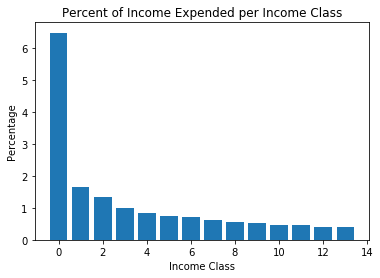

In [33]:
plt.bar(percentages.index, percentages.ExpInc)
plt.title("Percent of Income Expended per Income Class")
plt.xlabel("Income Class")
plt.ylabel("Percentage")
plt.show()

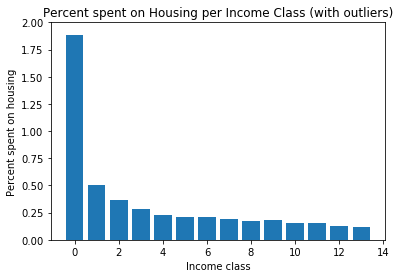

In [29]:
plt.bar(percentages.index, percentages.iHousing)
plt.ylim(0,2)
plt.title("Percent spent on Housing per Income Class (with outliers)")
plt.xlabel("Income class")
plt.ylabel("Percent spent on housing")
plt.show()

### Creating Csv of percentages

In [17]:
# percentages.to_csv(outputDir+"plyntyCsv.csv")

# Exploring Issues in the data

### Graph of number of observations in the income brackets

[498 448 436 419 392 346 314 304 300 285 256 204 124  87]


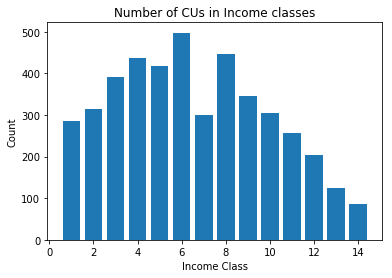

In [18]:
# ploting the number of people in each bracket
print(inclassExpenses.INCLASS.value_counts().values)
plt.bar(list(inclassExpenses.INCLASS.value_counts().index.tolist()), inclassExpenses.INCLASS.value_counts().values, align='center')
plt.title("Number of CUs in Income classes")
plt.xlabel("Income Class")
plt.ylabel("Count")
plt.show()

### Checking the Standard Deviations

What I'm finding is that the higher income brackets (>150k) have high standard deviations for housing.
My thoughts on why this could be
- Non-reporting
- disposable income combined with preference in lifestyle
 - people with higher incomes have the choice if they want to spend more on a house


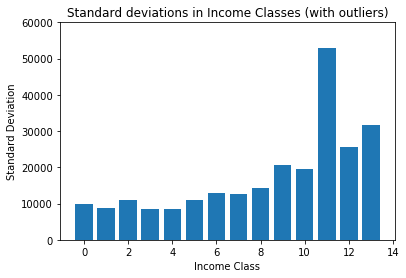

In [19]:
inclassSD = inclassExpenses.groupby(['INCLASS'],as_index=False).std()
inclassSD.iHousing
plt.bar(inclassSD.iHousing.index, inclassSD.iHousing,)
plt.title("Standard deviations in Income Classes (with outliers)")
plt.ylim(0,60000)
plt.xlabel("Income Class")
plt.ylabel("Standard Deviation")
plt.show()

### Dataframe of rows with negative values for housing for incomeclasses

In [20]:
inclassExpenses.loc[inclassExpenses.iHousing <= 0]

,NEWID,INCLASS,FINCBTXM,iTotalExp,iFoodAtHome,iFoodAway,iHousing,iUtilites,iClothingAndBeauty,iTransportation,iHealthcare,iEntertainment,iMiscellaneous,iCharitableAndFamilyGiving,iInsurance,iEducation,iHousingPrinciple
345,2997872,5,53456.8,40896.0,7768.0,3272.0,-2572.0,6816.0,0.0,5424.0,5276.0,0.0,140.0,0.0,0.0,14772.0,0.0
971,2997873,3,20226.6,13388.0,7780.0,3512.0,-12980.0,6916.0,400.0,3800.0,3600.0,0.0,360.0,0.0,0.0,0.0,0.0
2590,2997875,5,46495.4,17228.0,8156.0,3532.0,-10180.0,6148.0,0.0,4532.0,3600.0,120.0,1320.0,0.0,0.0,0.0,0.0


### Getting Description of the inclassExpenses dataframe

In [21]:
# max and min of housing per income class
rowDescription = []
for inclass in range(1,len(incomeBrackets)):
    rowDescription.append(inclassExpenses.iHousing.loc[inclassExpenses.INCLASS == inclass].describe())
descriptions = pd.concat(rowDescription, axis=1)
descriptions.columns = range(0,len(incomeBrackets)-1)
descriptions = descriptions.transpose()
descriptions

,count,mean,std,min,25%,50%,75%,max
0,285.0,8885.719298,9908.802726,190.0,3000.0,6396.0,10870.00,100452.0
1,314.0,7802.646497,8773.711443,30.0,2927.0,5396.0,9550.00,79576.0
2,392.0,9205.979592,11119.163524,-12980.0,3409.0,6792.0,10880.00,100556.0
3,436.0,10321.944954,8396.444117,120.0,4645.0,8938.0,13660.00,69796.0
4,419.0,11029.474940,8603.639679,-10180.0,4398.0,9552.0,15008.00,52912.0
5,498.0,13139.455823,10877.852585,40.0,6131.0,11228.0,17225.00,109400.0
6,300.0,15388.730000,13008.621235,400.0,7107.5,13332.0,20266.00,146416.0
7,448.0,17174.352679,12672.424747,610.0,8773.0,14308.0,21668.25,90984.0
8,346.0,19365.393064,14323.270206,988.0,9038.5,16158.0,25212.00,108044.0
9,304.0,24082.756579,20630.981091,910.0,12263.0,20848.0,30238.50,227912.0


### Testing the removal of outliers in iHousing
 - For each income class
    - Find Q1 and Q3
    - Calculate IQR
    - Find rows outside of Q3/Q2 +/- (1.5 *IQR)
 - Remove Rows from Dataframe

In [22]:
# cleaning the inclassExpenses dataframe of outliers
outliers1 = inclassExpenses.copy()
outliers1
removeRows = []

print("There are "+str(len(inclassExpenses))+" rows before removal of outliers")

for inclass in range(1,len(incomeBrackets)):
    outliers1InClass = outliers1.where(outliers1['INCLASS']==inclass)
    Q1 = outliers1InClass['iHousing'].quantile(0.25)
    Q3 = outliers1InClass['iHousing'].quantile(0.75)
    IQR = Q3 - Q1
    removeRows.extend(outliers1InClass[outliers1InClass['iHousing'] < (Q1 - (1.5 * IQR))].index.tolist())
    removeRows.extend(outliers1InClass[outliers1InClass['iHousing'] > (Q3 + (1.5 * IQR))].index.tolist())
clean1 = outliers1.drop(outliers1.index[removeRows])
clean1

print("Removed "+str(len(removeRows))+ " rows deemed to be outliers")
print("Removed "+str(round(len(removeRows)/len(inclassExpenses)*100,2))+ "% of the CUs")

# creating the descriptions for the cleaned outlier dataframe
rowDescription1 = []
for inclass in range(1,len(incomeBrackets)):
    rowDescription1.append(clean1.iHousing.loc[clean1.INCLASS == inclass].describe())
descriptions1 = pd.concat(rowDescription1, axis=1)
descriptions1.columns = range(0,len(incomeBrackets)-1)
descriptions1 = descriptions1.transpose()
descriptions1

There are 4413 rows before removal of outliers
Removed 197 rows deemed to be outliers
Removed 4.46% of the CUs


,count,mean,std,min,25%,50%,75%,max
0,265.0,6905.052830,5086.669753,190.0,2764.0,5980.0,9680.00,21924.0
1,293.0,6086.061433,4482.829522,30.0,2756.0,4920.0,8504.00,19200.0
2,368.0,7248.260870,5014.299226,60.0,3368.0,6482.0,9778.50,21852.0
3,414.0,8971.963768,5782.631732,120.0,4477.0,8330.0,12628.00,26736.0
4,406.0,10114.448276,6950.864899,-10180.0,4269.0,9222.0,14446.00,29336.0
5,482.0,11800.506224,7174.029307,40.0,5889.0,11078.0,16580.00,33184.0
6,291.0,13927.969072,8609.335116,400.0,6796.0,13112.0,19004.00,39896.0
7,425.0,15108.985882,8644.506513,610.0,8652.0,13976.0,20244.00,39932.0
8,336.0,17818.973214,10865.234442,988.0,8872.5,15868.0,24323.00,48516.0
9,292.0,21092.797945,11406.337230,910.0,12092.0,20370.0,28185.00,56912.0


In [23]:
clean1

,NEWID,INCLASS,FINCBTXM,iTotalExp,iFoodAtHome,iFoodAway,iHousing,iUtilites,iClothingAndBeauty,iTransportation,iHealthcare,iEntertainment,iMiscellaneous,iCharitableAndFamilyGiving,iInsurance,iEducation,iHousingPrinciple
0,2792005,3,23920.0,24400.0,5220.0,1040.0,6600.0,5856.0,0.0,4748.0,2444.0,1584.0,520.0,0.0,0.0,0.0,3612.0
1,2792825,12,211240.8,99225.0,3200.0,2360.0,40273.0,8248.0,2232.0,16808.0,17000.0,7400.0,0.0,2000.0,0.0,1600.0,1896.0
2,2793125,5,49327.6,23786.8,2080.0,2080.0,2280.0,2244.0,40.0,5232.0,5730.8,1500.0,2600.0,0.0,0.0,0.0,0.0
3,2793225,7,70918.0,37704.0,4680.0,4800.0,3252.0,7344.0,12500.0,1800.0,1840.0,1488.0,0.0,0.0,0.0,0.0,0.0
4,2793275,10,144961.4,63180.0,8060.0,4308.0,34764.0,5760.0,1380.0,9164.0,2960.0,1548.0,760.0,2800.0,2024.0,0.0,10348.0
5,2793815,4,35000.0,20456.0,1064.0,1064.0,10092.0,1452.0,780.0,1700.0,1516.0,1068.0,60.0,1000.0,660.0,0.0,0.0
6,2794205,8,90280.0,55544.0,6500.0,11440.0,5432.0,4068.0,4000.0,4960.0,5440.0,2988.0,0.0,320.0,1652.0,8744.0,0.0
7,2794335,9,107888.0,56676.0,5616.0,6420.0,24504.0,2508.0,1824.0,5704.0,3032.0,3436.0,568.0,1020.0,2044.0,0.0,0.0
8,2794635,6,57259.0,36150.8,3120.0,2600.0,1028.0,4128.0,360.0,11356.0,1438.8,1320.0,0.0,10800.0,0.0,0.0,0.0
10,2795615,10,122080.0,59236.0,10280.0,8016.0,17092.0,8560.0,640.0,11868.0,120.0,3080.0,312.0,0.0,1024.0,0.0,1756.0


### Plotting the Standard deviations for the No outlier dataframe

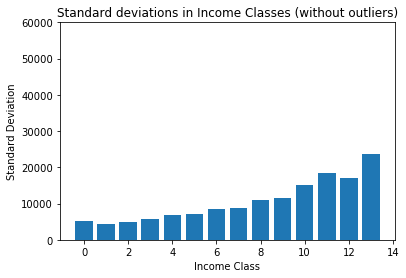

In [24]:
inclassClean1SD = clean1.groupby(['INCLASS'],as_index=False).std()
inclassClean1SD.iHousing
plt.bar(inclassClean1SD.iHousing.index, inclassClean1SD.iHousing,)
plt.ylim(0,60000)
plt.title("Standard deviations in Income Classes (without outliers)")
plt.xlabel("Income Class")
plt.ylabel("Standard Deviation")
plt.show()

### Things learned from removing outliers
- Removing outliers helped some of the standard deviation crazyness
- Higher incomebrackets have greater standard deviation even without outliers

### Creating the percentage output for cleaned dataframe

In [31]:
# creating percentage outputs for cleaned dataframe
inclassCleanAverages = round(clean1.ix[: ,clean1.columns != 'NEWID'].groupby(['INCLASS'],as_index=False).mean(),2)
# creating new dataframe for the percentages that only includes the plynty categories
cleanPercentages = inclassCleanAverages.loc[:,rollupNames[1:]]
for column in rollupNames[1:]:
    cleanPercentages[column] = inclassCleanAverages[column]/inclassCleanAverages.FINCBTXM
cleanPercentages['ExpInc'] = inclassCleanAverages['iTotalExp']/inclassCleanAverages['FINCBTXM']    
cleanPercentages

,iFoodAtHome,iFoodAway,iHousing,iUtilites,iClothingAndBeauty,iTransportation,iHealthcare,iEntertainment,iMiscellaneous,iCharitableAndFamilyGiving,iInsurance,iEducation,iHousingPrinciple,ExpInc
0,0.809649,0.391283,1.452441,0.623634,0.140792,1.058995,0.570850,0.278890,0.119596,0.305469,0.015555,0.005690,0.116996,5.655844
1,0.225084,0.091795,0.392668,0.184455,0.039635,0.241574,0.135986,0.078636,0.028399,0.045268,0.006622,0.019189,0.022806,1.466505
2,0.181489,0.075899,0.289069,0.134268,0.028801,0.242525,0.140759,0.075496,0.035062,0.031589,0.005791,0.006675,0.026143,1.221279
3,0.126332,0.060704,0.244119,0.092123,0.026635,0.164293,0.105486,0.061984,0.027630,0.042843,0.005350,0.002877,0.023643,0.936733
4,0.104802,0.052571,0.207592,0.080923,0.021983,0.178057,0.086652,0.047571,0.015013,0.032824,0.005284,0.004970,0.023764,0.814476
5,0.085685,0.043799,0.191163,0.069210,0.022245,0.137269,0.087764,0.037520,0.017898,0.027734,0.005002,0.013101,0.029864,0.708528
6,0.081010,0.040403,0.186202,0.059483,0.020451,0.134673,0.085482,0.038651,0.009296,0.020863,0.006372,0.007778,0.026786,0.663879
7,0.067462,0.037584,0.167969,0.053516,0.017251,0.130520,0.066156,0.038906,0.009784,0.029248,0.006145,0.007034,0.028745,0.602830
8,0.060135,0.036973,0.162365,0.047926,0.017112,0.110778,0.059582,0.035508,0.010175,0.023927,0.005867,0.008290,0.033119,0.545520
9,0.052091,0.034238,0.157707,0.041185,0.017010,0.098268,0.048178,0.033319,0.008133,0.025110,0.003723,0.013272,0.030551,0.501684


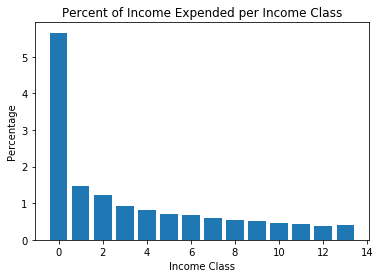

In [32]:
plt.bar(cleanPercentages.index, cleanPercentages.ExpInc)
plt.title("Percent of Income Expended per Income Class")
plt.xlabel("Income Class")
plt.ylabel("Percentage")
plt.show()

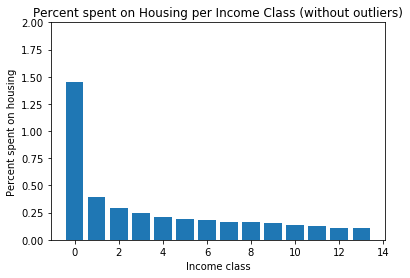

In [26]:
plt.bar(cleanPercentages.index, cleanPercentages.iHousing)
plt.ylim(0,2)
plt.title("Percent spent on Housing per Income Class (without outliers)")
plt.xlabel("Income class")
plt.ylabel("Percent spent on housing")
plt.show()

### Cell that determines how similar the neighbor rows are
Potentially use this to combine similar rows.
Can't figure out the correct statistical test to determine if rows are statistically similar

###### The higher the difference value the more different the rows are. (low values mean similar rows)

In [27]:
significance = 0.005
for row in range(len(cleanPercentages)-1):
    print("Income Bracket Range 1: $"+str(incomeBrackets[row])+" - "+"$"+str(incomeBrackets[row+1]))
    print("Income Bracket Range 2: $"+str(incomeBrackets[row+1])+" - "+"$"+str(incomeBrackets[row+2]))
    print("Number of CUs in Income Bracket 1: "+str(inclassExpenses.INCLASS.value_counts().values[row]))
    print("Number of CUs in Income Bracket 2: "+str(inclassExpenses.INCLASS.value_counts().values[row+1]))
    print("Rows in Percentage Dataframe: Row "+str(row)+" and Row "+str(row+1))
    difference = 0
    for column in range(len(cleanPercentages.columns)):
        difference += (cleanPercentages.loc[column].mean() * abs(cleanPercentages.ix[row,column] - cleanPercentages.ix[row+1,column]))
        if abs(cleanPercentages.ix[row,column] - cleanPercentages.ix[row+1,column]) < significance:
            print("Column: "+str(cleanPercentages.columns[column]))
    print("The difference value is: "+str(round(difference*1000,2)))
    print()

Income Bracket Range 1: $-inf - $11000
Income Bracket Range 2: $11000 - $20000
Number of CUs in Income Bracket 1: 498
Number of CUs in Income Bracket 2: 448
Rows in Percentage Dataframe: Row 0 and Row 1
The difference value is: 545.28

Income Bracket Range 1: $11000 - $20000
Income Bracket Range 2: $20000 - $30000
Number of CUs in Income Bracket 1: 448
Number of CUs in Income Bracket 2: 436
Rows in Percentage Dataframe: Row 1 and Row 2
Column: iTransportation
Column: iHealthcare
Column: iEntertainment
Column: iInsurance
Column: iHousingPrinciple
The difference value is: 38.25

Income Bracket Range 1: $20000 - $30000
Income Bracket Range 2: $30000 - $43000
Number of CUs in Income Bracket 1: 436
Number of CUs in Income Bracket 2: 419
Rows in Percentage Dataframe: Row 2 and Row 3
Column: iClothingAndBeauty
Column: iInsurance
Column: iEducation
Column: iHousingPrinciple
The difference value is: 42.82

Income Bracket Range 1: $30000 - $43000
Income Bracket Range 2: $43000 - $55000
Number of

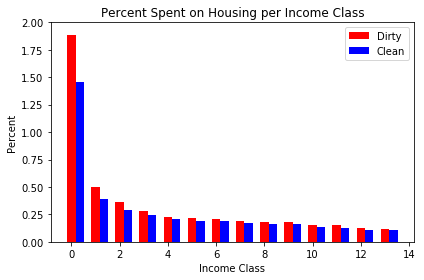

In [28]:
n_groups = 2
values1 = percentages.iHousing
values2 = cleanPercentages.iHousing

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 1
 
rects1 = plt.bar(percentages.index, values1, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Dirty')
 
rects2 = plt.bar(cleanPercentages.index + bar_width, values2, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Clean')
 
plt.xlabel('Income Class')
plt.ylabel('Percent')
plt.title('Percent Spent on Housing per Income Class')
plt.ylim(0,2)
plt.legend()
 
plt.tight_layout()
plt.show()